__Logistic Regression__ is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

# Logistic Regression Assumptions

 1. Binary logistic regression requires the dependent variable to be binary.
    
 2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
 
 3. Only the meaningful variables should be included.

 4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

 5. The independent variables are linearly related to the log odds.

 6. Logistic regression requires quite large sample sizes.

Keeping the above assumptions in mind, let’s look at our dataset.

# Data

The dataset comes from the The Spotify Hit Predictor Dataset (1960-2019) of Kaggle, and it is consisting of features for tracks fetched using Spotify's Web API. The dataset starting from Jan 1st, 1990, ending at Dec 31st, 1999. There might be some songs from the 50s, too. The classification goal is to predict whether the track will would be a 'Hit' (1) or not (0) (variable y).

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

The dataset includes 5520 records and 19 fields.

In [2]:
data = pd.read_csv('dataset-of-90s.csv')
print(data.shape)
print(data.columns)

(5520, 19)
Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')


In [3]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 19 columns):
track               5520 non-null object
artist              5520 non-null object
uri                 5520 non-null object
danceability        5520 non-null float64
energy              5520 non-null float64
key                 5520 non-null int64
loudness            5520 non-null float64
mode                5520 non-null int64
speechiness         5520 non-null float64
acousticness        5520 non-null float64
instrumentalness    5520 non-null float64
liveness            5520 non-null float64
valence             5520 non-null float64
tempo               5520 non-null float64
duration_ms         5520 non-null int64
time_signature      5520 non-null int64
chorus_hit          5520 non-null float64
sections            5520 non-null int64
target              5520 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 819.5+ KB


### Input variables

 1. track: The Name of the track — (categorial)
 2. artist: The Name of the first artist listed for the track — (categorial)
 3. uri: The resource identifier for the track — (categorial)
 4. danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements —(numeric).
 5. energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks — (numeric).
 6. key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, — (numeric).
 7. loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful — (numeric).
 8. mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is — (numeric).
 9. speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book — (numeric).
 10. acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is — (numeric).
 11. instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. — (numeric).
 12. liveness: Detects the presence of an audience in the recording — (numeric). 
 13. valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. — (numeric). 
 14. tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed — (numeric). 
 15. duration_ms: The duration of the track in milliseconds — (numeric). 
 16. time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats —(numeric).
 17. chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third —(numeric).
 18. sections: The number of sections the particular track has. This feature was extracted from the data recieved by the API call — (numeric)
 

### Predict variable (desired target):

target — whether the track is a hit or not? (binary: “1”, means “Yes”, “0” means “No”)

In [5]:
data['track'].unique()
print(len(data['track'].unique()))

5311


In [6]:
print(data['artist'].unique())
print(len(data['artist'].unique()))

['Astrud Gilberto' 'All Saints' 'Gregg Karukas' ... 'Boss' 'Reagan Youth'
 'Edie Brickell']
2476


In [7]:
print(data['uri'].unique())
print(len(data['uri'].unique()))

['spotify:track:50RBM1j1Dw7WYmsGsWg9Tm'
 'spotify:track:5FTz9qQ94PyUHETyAyfYZN'
 'spotify:track:6m24oe3lk1UMxq9zq4iPFi' ...
 'spotify:track:6UPfnVoOq3y3BvapBIKs8J'
 'spotify:track:2Ao3Wi4raEOQfKQiU9EU8y'
 'spotify:track:3ca91BX2k7GSzEUsx1mPgI']
5506


# Data exploration

In [8]:
data['target'].value_counts()

1    2760
0    2760
Name: target, dtype: int64

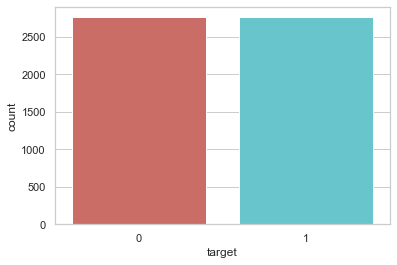

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='target', data=data, palette= 'hls')
plt.show()
plt.savefig('count_plot')

In [10]:
count_no_hit = len(data[data['target']==0])
count_hit = len(data[data['target']==1])
pct_of_no_hit = count_no_hit/(count_no_hit+count_hit)
print("\033[1m percentage of no hit is", pct_of_no_hit*100)
pct_of_hit = count_hit/(count_no_hit+count_hit)
print("\033[1m percentage of hit", pct_of_hit*100)

 percentage of no hit is 50.0
 percentage of hit 50.0


Our classes are imbalanced, and the ratio of no-hit to hit instances is 50:50. Let’s do some more exploration.

In [11]:
data.groupby('target').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
target,,,,,,,,,,,,,,,
0,0.485017,0.546950,5.075362,-11.947620,0.678261,0.069840,0.412928,0.289959,0.215048,0.493754,119.874108,248673.717391,3.882246,41.979795,10.927899
1,0.648769,0.657542,5.450725,-8.522604,0.660870,0.078152,0.169511,0.029814,0.179356,0.581617,117.806741,263748.270652,3.962681,40.018922,11.328623


# Observations:
 1. The average danceability level of hits is higher than that of non-hits.
 2. The average energy level of hits is higher than that of non-hits.
 3. The average key level of hits is a bit lower than that of non-hits.
 4. The average loudness level of hits is lower than that of non-hits.
 5. The average mode level of hits is higher than that of non-hits.
 6. The average speechiness level of hits is a bit lower than that of non-hits.
 7. The average acousticness level of hits is a bit lower than that of non-hits.
 8. The average instrumentalness level of hits is lower than that of non-hits.
 9. The average liveness level of hits is a bit lower than that of non-hits.
 10. The average valence level of hits is higher than that of non-hits.
 11. The average tempo level of hits is higher than that of non-hits.
 12. The average duration_ms level of hits is lower than that of non-hits.
 13. The average time_signature level of hits is higher than that of non-hits.
 14. The average chorus_hit level of hits is a bit lower than that of non-hits.
 15. The average sections level of hits is a bit lower than that of non-hits.


# Visualizations

## 1. danceability

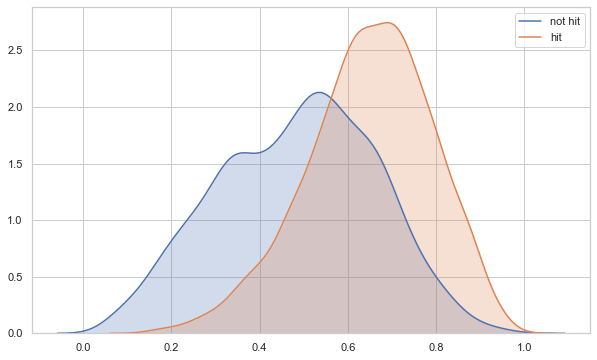

In [12]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(data['danceability'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['danceability'].loc[data['target'] == 1], label='hit', shade=True);

In [13]:
data['danceability'].loc[data['target'] == 0].describe()

count    2760.000000
mean        0.485017
std         0.177634
min         0.057600
25%         0.349750
50%         0.498000
75%         0.617000
max         0.976000
Name: danceability, dtype: float64

In [14]:
data['danceability'].loc[data['target'] == 1].describe()

count    2760.000000
mean        0.648769
std         0.141827
min         0.153000
25%         0.560000
50%         0.657000
75%         0.750000
max         0.979000
Name: danceability, dtype: float64

## 2. energy

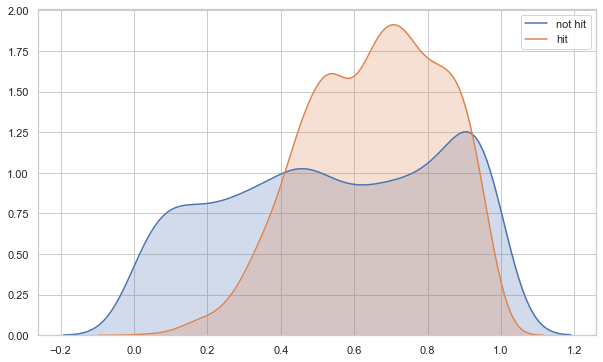

In [15]:
sns.kdeplot(data['energy'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['energy'].loc[data['target'] == 1], label='hit', shade=True);

In [16]:
data['energy'].loc[data['target'] == 0].describe()

count    2760.000000
mean        0.546950
std         0.295660
min         0.000357
25%         0.303750
50%         0.554000
75%         0.821000
max         0.998000
Name: energy, dtype: float64

In [17]:
data['energy'].loc[data['target'] == 1].describe()

count    2760.000000
mean        0.657542
std         0.183547
min         0.022300
25%         0.519750
50%         0.670000
75%         0.806000
max         0.997000
Name: energy, dtype: float64

## 3. key

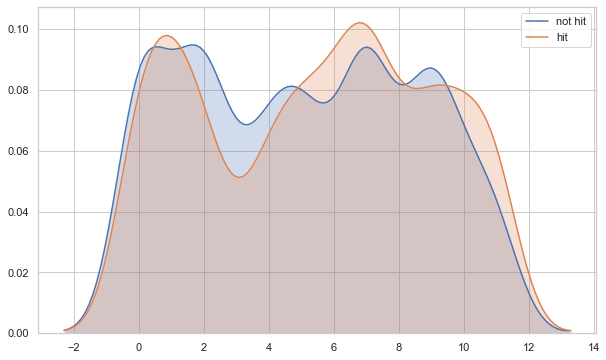

In [18]:
sns.kdeplot(data['key'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['key'].loc[data['target'] == 1], label='hit', shade=True);

In [19]:
data['key'].loc[data['target'] == 0].describe()

count    2760.000000
mean        5.075362
std         3.476234
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        11.000000
Name: key, dtype: float64

In [20]:
data['key'].loc[data['target'] == 1].describe()

count    2760.000000
mean        5.450725
std         3.536856
min         0.000000
25%         2.000000
50%         6.000000
75%         8.000000
max        11.000000
Name: key, dtype: float64

## 4. loudness

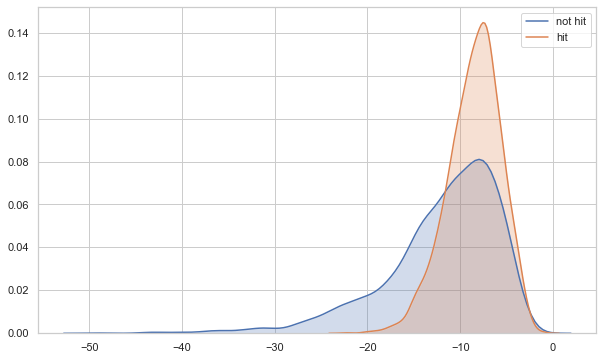

In [21]:
sns.kdeplot(data['loudness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['loudness'].loc[data['target'] == 1], label='hit', shade=True);

In [22]:
data['loudness'].loc[data['target'] == 0].describe()

count    2760.000000
mean      -11.947620
std         6.182527
min       -49.253000
25%       -14.750500
50%       -10.634000
75%        -7.522250
max        -1.555000
Name: loudness, dtype: float64

In [23]:
data['loudness'].loc[data['target'] == 1].describe()

count    2760.000000
mean       -8.522604
std         2.879014
min       -22.320000
25%       -10.324000
50%        -8.222500
75%        -6.531750
max        -1.169000
Name: loudness, dtype: float64

## 5. mode

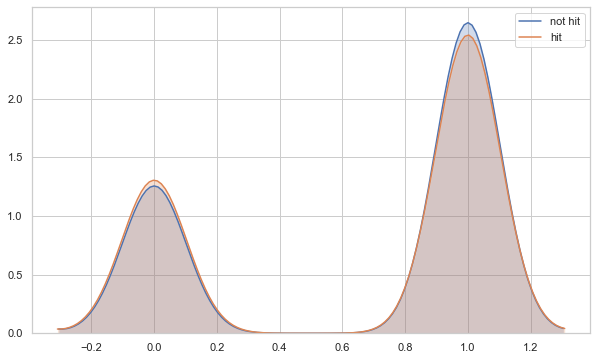

In [24]:
sns.kdeplot(data['mode'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['mode'].loc[data['target'] == 1], label='hit', shade=True);

In [25]:
data['mode'].loc[data['target'] == 0].describe()

count    2760.000000
mean        0.678261
std         0.467228
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: mode, dtype: float64

In [26]:
data['mode'].loc[data['target'] == 1].describe()

count    2760.00000
mean        0.66087
std         0.47350
min         0.00000
25%         0.00000
50%         1.00000
75%         1.00000
max         1.00000
Name: mode, dtype: float64

## 6. speechiness

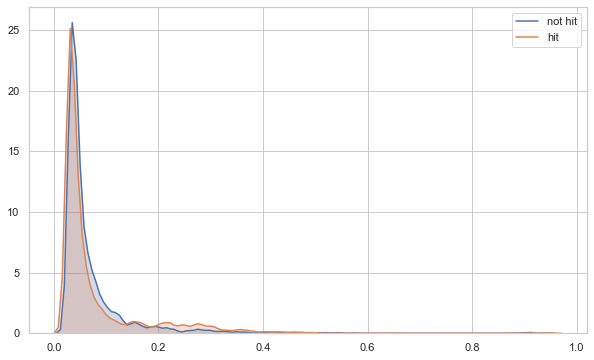

In [27]:
sns.kdeplot(data['speechiness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['speechiness'].loc[data['target'] == 1], label='hit', shade=True);

In [28]:
data['speechiness'].loc[data['target'] == 0].describe()

count    2760.000000
mean        0.069840
std         0.075243
min         0.022800
25%         0.035575
50%         0.044850
75%         0.071625
max         0.940000
Name: speechiness, dtype: float64

In [29]:
data['speechiness'].loc[data['target'] == 1].describe()

count    2760.000000
mean        0.078152
std         0.088019
min         0.022000
25%         0.031000
50%         0.040800
75%         0.074225
max         0.950000
Name: speechiness, dtype: float64

## 7. acousticness

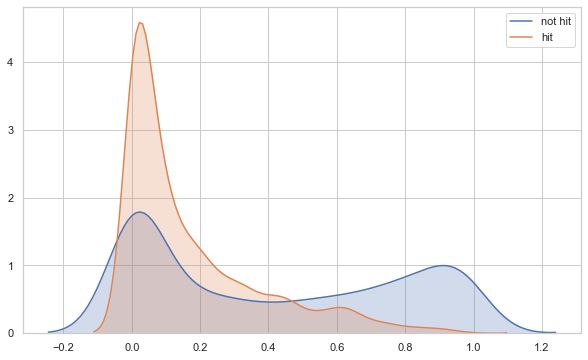

In [30]:
sns.kdeplot(data['acousticness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['acousticness'].loc[data['target'] == 1], label='hit', shade=True);

In [31]:
data['acousticness'].loc[data['target'] == 0].describe()

count    2760.000000
mean        0.412928
std         0.374530
min         0.000000
25%         0.015600
50%         0.332000
75%         0.796000
max         0.996000
Name: acousticness, dtype: float64

In [32]:
data['acousticness'].loc[data['target'] == 1].describe()

count    2760.000000
mean        0.169511
std         0.202233
min         0.000009
25%         0.019400
50%         0.083550
75%         0.249000
max         0.986000
Name: acousticness, dtype: float64

## 8. instrumentalness

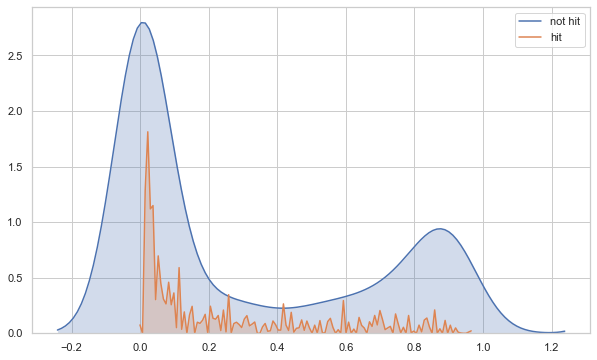

In [33]:
sns.kdeplot(data['instrumentalness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['instrumentalness'].loc[data['target'] == 1], label='hit', shade=True);

In [34]:
data['instrumentalness'].loc[data['target'] == 0].describe()

count    2760.000000
mean        0.289959
std         0.370336
min         0.000000
25%         0.000019
50%         0.016250
75%         0.703250
max         0.997000
Name: instrumentalness, dtype: float64

In [35]:
data['instrumentalness'].loc[data['target'] == 1].describe()

count    2760.000000
mean        0.029814
std         0.119841
min         0.000000
25%         0.000000
50%         0.000012
75%         0.001062
max         0.965000
Name: instrumentalness, dtype: float64

## 9. liveness

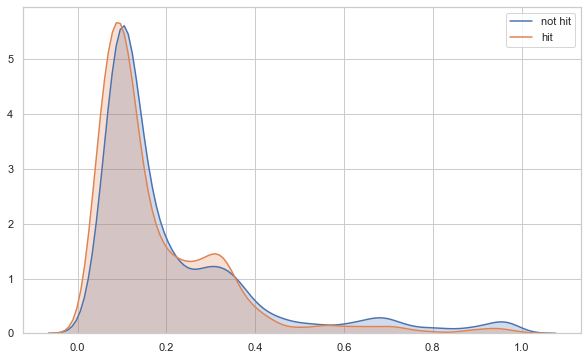

In [36]:
sns.kdeplot(data['liveness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['liveness'].loc[data['target'] == 1], label='hit', shade=True);

In [37]:
data['liveness'].loc[data['target'] == 0].describe()

count    2760.000000
mean        0.215048
std         0.192212
min         0.021900
25%         0.096375
50%         0.135000
75%         0.278000
max         0.989000
Name: liveness, dtype: float64

In [38]:
data['liveness'].loc[data['target'] == 1].describe()

count    2760.000000
mean        0.179356
std         0.152904
min         0.013000
25%         0.081675
50%         0.121000
75%         0.241000
max         0.992000
Name: liveness, dtype: float64

## 10. valence

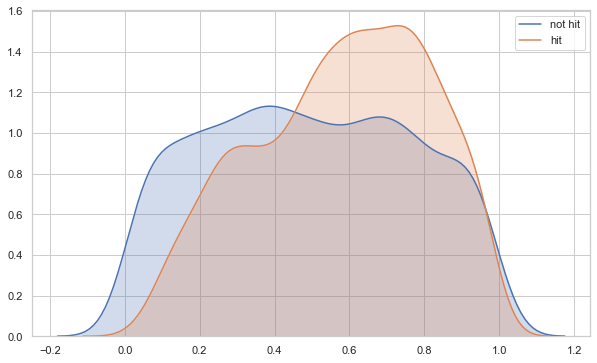

In [39]:
sns.kdeplot(data['valence'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['valence'].loc[data['target'] == 1], label='hit', shade=True);

In [40]:
data['valence'].loc[data['target'] == 0].describe()

count    2760.000000
mean        0.493754
std         0.275283
min         0.000000
25%         0.262750
50%         0.487000
75%         0.722000
max         0.996000
Name: valence, dtype: float64

In [41]:
data['valence'].loc[data['target'] == 1].describe()

count    2760.000000
mean        0.581617
std         0.230626
min         0.039100
25%         0.405000
50%         0.604000
75%         0.765000
max         0.981000
Name: valence, dtype: float64

## 11. tempo

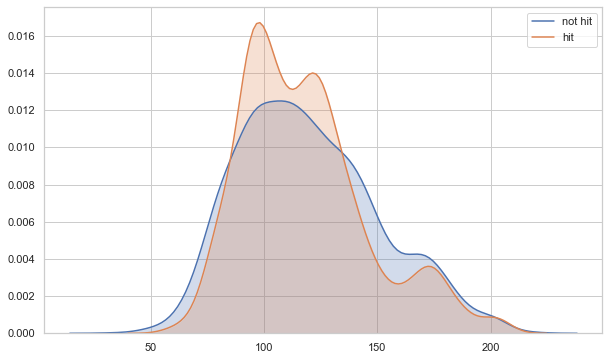

In [42]:
sns.kdeplot(data['tempo'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['tempo'].loc[data['target'] == 1], label='hit', shade=True);

In [43]:
data['tempo'].loc[data['target'] == 0].describe()

count    2760.000000
mean      119.874108
std        30.866217
min        34.535000
25%        96.228000
50%       116.017000
75%       139.794500
max       217.943000
Name: tempo, dtype: float64

In [44]:
data['tempo'].loc[data['target'] == 1].describe()

count    2760.000000
mean      117.806741
std        28.012728
min        57.082000
25%        96.806750
50%       113.970000
75%       131.981250
max       207.639000
Name: tempo, dtype: float64

## 12. duration_ms

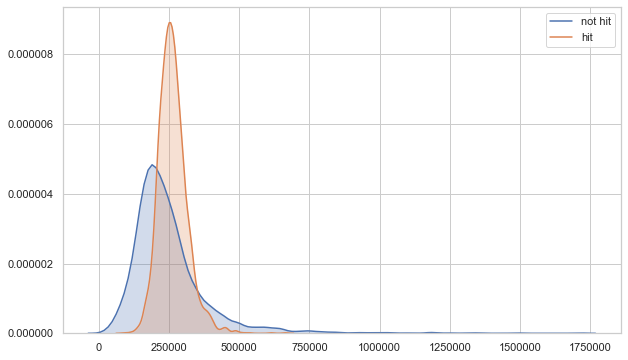

In [45]:
sns.kdeplot(data['duration_ms'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['duration_ms'].loc[data['target'] == 1], label='hit', shade=True);

In [46]:
data['duration_ms'].loc[data['target'] == 0].describe()

count    2.760000e+03
mean     2.486737e+05
std      1.366360e+05
min      1.953300e+04
25%      1.689802e+05
50%      2.207135e+05
75%      2.877995e+05
max      1.711800e+06
Name: duration_ms, dtype: float64

In [47]:
data['duration_ms'].loc[data['target'] == 1].describe()

count      2760.000000
mean     263748.270652
std       51189.772240
min       90733.000000
25%      230030.000000
50%      258586.500000
75%      290833.250000
max      665160.000000
Name: duration_ms, dtype: float64

## 13. time_signature

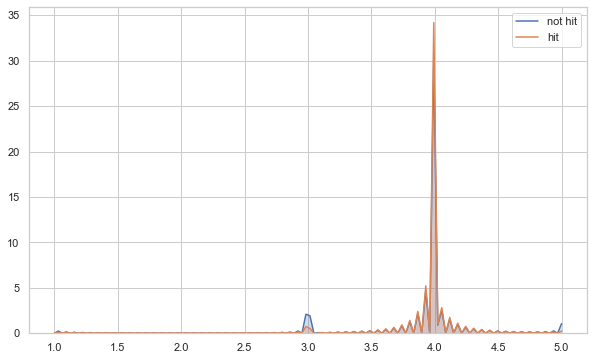

In [48]:
sns.kdeplot(data['time_signature'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['time_signature'].loc[data['target'] == 1], label='hit', shade=True);

In [49]:
data['time_signature'].loc[data['target'] == 0].describe()

count    2760.000000
mean        3.882246
std         0.439418
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: time_signature, dtype: float64

In [50]:
data['time_signature'].loc[data['target'] == 1].describe()

count    2760.000000
mean        3.962681
std         0.229373
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: time_signature, dtype: float64

## 14. chorus_hit

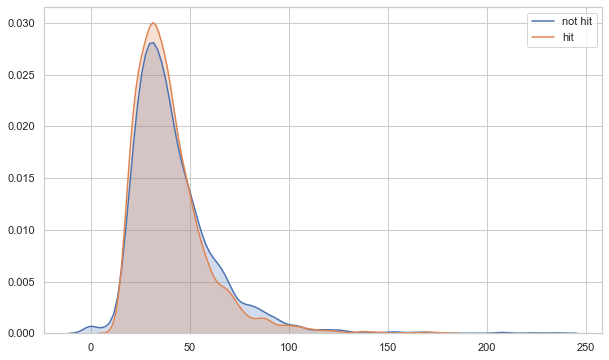

In [51]:
sns.kdeplot(data['chorus_hit'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['chorus_hit'].loc[data['target'] == 1], label='hit', shade=True);

In [52]:
data['chorus_hit'].loc[data['target'] == 0].describe()

count    2760.000000
mean       41.979795
std        21.204848
min         0.000000
25%        28.394527
50%        37.059560
75%        50.273545
max       235.060740
Name: chorus_hit, dtype: float64

In [53]:
data['chorus_hit'].loc[data['target'] == 1].describe()

count    2760.000000
mean       40.018922
std        18.544879
min        13.544610
25%        27.728765
50%        35.898535
75%        47.290687
max       177.385990
Name: chorus_hit, dtype: float64

## 15. sections

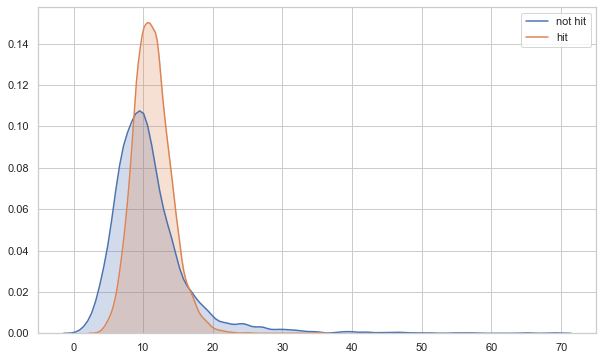

In [54]:
sns.kdeplot(data['sections'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['sections'].loc[data['target'] == 1], label='hit', shade=True);

In [55]:
data['sections'].loc[data['target'] == 0].describe()

count    2760.000000
mean       10.927899
std         5.726668
min         1.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        69.000000
Name: sections, dtype: float64

In [56]:
data['sections'].loc[data['target'] == 1].describe()

count    2760.000000
mean       11.328623
std         2.713513
min         4.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        35.000000
Name: sections, dtype: float64

Our final data columns will be:

In [57]:
data_final=data.copy()
data_final.columns.values

array(['track', 'artist', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'chorus_hit', 'sections', 'target'], dtype=object)

In [58]:
data_final.drop(['track', 'artist', 'uri'], axis=1, inplace=True)

In [59]:
data_final.columns.values

array(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections',
       'target'], dtype=object)

In [60]:
X = data_final.loc[:, data_final.columns != 'target']
y = data_final.loc[:, data_final.columns == 'target']
y=y.astype('int')

# Implementing the model

In [61]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.424573
         Iterations 8
                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.387    
Dependent Variable:  target           AIC:              4717.2821
Date:                2020-06-03 00:12 BIC:              4816.5241
No. Observations:    5520             Log-Likelihood:   -2343.6  
Df Model:            14               LL-Null:          -3826.2  
Df Residuals:        5505             LLR p-value:      0.0000   
Converged:           1.0000           Scale:            1.0000   
No. Iterations:      8.0000                                      
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
danceability      7.3505   0.3134  23.4548 0.0000  6.7362  7.9647
energy           -1.9198   0.2853  -6.7302 0.0000 -2.4789 -1.3607


# Logistic Regression Model Fitting

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the test set results and calculating the accuracy

In [63]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.50


### Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  0 836]
 [  0 820]]


In [65]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  820 correct predictions.
 The result is telling us that we have:  836 incorrect predictions.
 We have a total predictions of:  1656


### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       836
           1       0.50      1.00      0.66       820

    accuracy                           0.50      1656
   macro avg       0.25      0.50      0.33      1656
weighted avg       0.25      0.50      0.33      1656



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Logistic Regression model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Logistic Regression model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic\nRegression model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Logistic Regression model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Logistic Regression model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Logistic Regression model: 49.52%
Well, you got a classification rate of 49.52%

Precision of Logistic Regression model: 49.52%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic
Regression model predicted a track is a hit, that track was actually a hit 49.52% of
 the time.

Recall of Logistic Regression model: 100.00%
Recall: If there is a track which is a hit the present in the test set, our Logistic Regression model
can identify it 100.00% of the time.


### ROC Curve

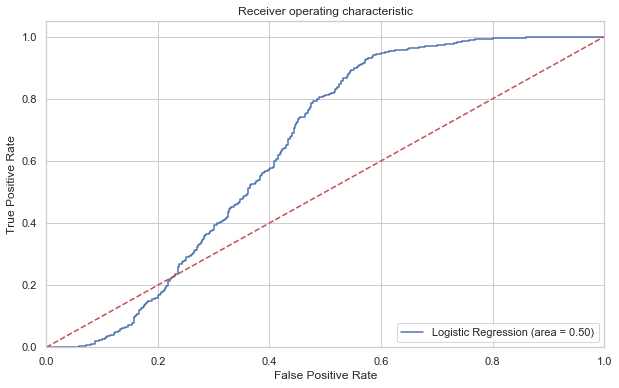

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Random forest Classifier Model Fitting

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predicting the test set results and calculating the accuracy

In [70]:
y_pred = rf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.84


### Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[679 157]
 [111 709]]


In [72]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  1388 correct predictions.
 The result is telling us that we have:  268 incorrect predictions.
 We have a total predictions of:  1656


### Compute precision, recall, F-measure and support

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       836
           1       0.82      0.86      0.84       820

    accuracy                           0.84      1656
   macro avg       0.84      0.84      0.84      1656
weighted avg       0.84      0.84      0.84      1656



In [74]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Random Forest model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Random Forest model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Random\nForest model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Random Forest model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Random Forest model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Random Forest model: 83.82%
Well, you got a classification rate of 83.82%

Precision of Random Forest model: 81.87%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Random
Forest model predicted a track is a hit, that track was actually a hit 81.87% of
 the time.

Recall of Random Forest model: 86.46%
Recall: If there is a track which is a hit the present in the test set, our Random Forest model
can identify it 86.46% of the time.


### ROC Curve

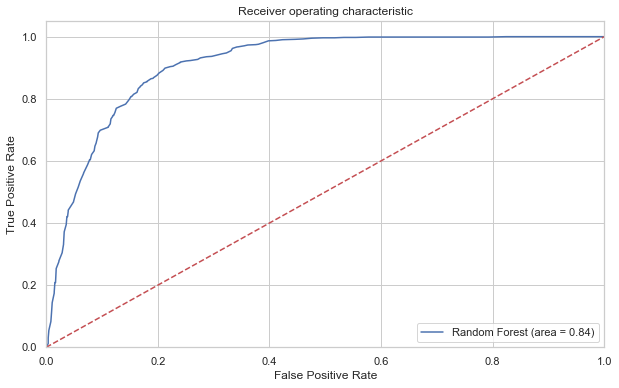

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Gradient boosting Classifier Model Fitting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Predicting the test set results and calculating the accuracy

In [77]:
y_pred = gb.predict(X_test)
print('Accuracy of gradient boosting classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of gradient boosting classifier on test set: 0.84


### Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[677 159]
 [103 717]]


In [79]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  1394 correct predictions.
 The result is telling us that we have:  262 incorrect predictions.
 We have a total predictions of:  1656


### Compute precision, recall, F-measure and support

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       836
           1       0.82      0.87      0.85       820

    accuracy                           0.84      1656
   macro avg       0.84      0.84      0.84      1656
weighted avg       0.84      0.84      0.84      1656



In [81]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Gradient Boosting model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Gradient Boosting model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Gradient\nBoosting model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Gradient Boosting model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Gradient Boosting model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Gradient Boosting model: 84.18%
Well, you got a classification rate of 84.18%

Precision of Gradient Boosting model: 81.85%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Gradient
Boosting model predicted a track is a hit, that track was actually a hit 81.85% of
 the time.

Recall of Gradient Boosting model: 87.44%
Recall: If there is a track which is a hit the present in the test set, our Gradient Boosting model
can identify it 87.44% of the time.


### ROC Curve

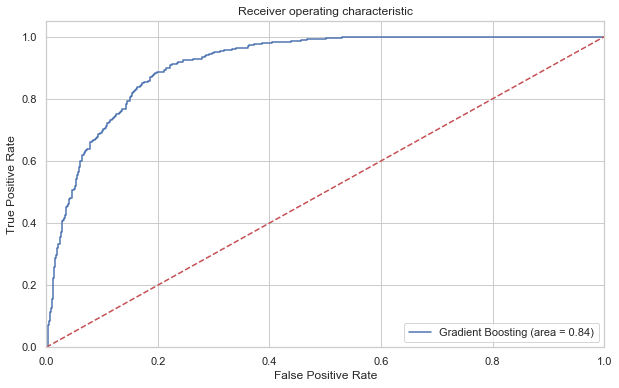

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

I would consider the gradient boosting as our final model

# Real time predictions

Finally, the best way to use this model is assigning hit Probability for each track, create segments, and build strategies on top of that. To get the churn probability from our model, utilize the code block below:

In [83]:
data['Prob_to_Hit'] = gb.predict_proba(data[X_train.columns])[:,1]

Our dataset looks like below at the end:

In [84]:
data[['track','artist','Prob_to_Hit']].head(10)

,track,artist,Prob_to_Hit
0,Misty Roses,Astrud Gilberto,0.034909
1,Never Ever,All Saints,0.883367
2,Soul Sermon,Gregg Karukas,0.200817
3,Clarinet Marmalade - Live,Alton Purnell,0.013384
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,0.406242
5,Cuspa Cerveja...,Os Pedrero,0.032506
6,Baby-Baby-Baby,TLC,0.937220
7,I Missed The Bus,Kris Kross,0.578443
8,The Comfort Zone,Vanessa Williams,0.590674
9,Hardcore Rules,25 Ta Life,0.023864


In [85]:
data.to_csv('Prob_to_Hit_90s.csv', index=False, encoding='utf-8')

# Your Turn!

Hopefully, this post gives you a good idea of what a machine learning classification project looks like. As you can see, much of the work is in the data wrangling and the preparation steps, and these procedures consume most of the time spent on machine learning.

Now it’s time to get out there and start exploring and cleaning your data. Try two or three algorithms, and let me know how it goes.

I would be pleased to receive feedback or questions on any of the above.